In [38]:
# Para no tener que reiniciar el kernel
%load_ext autoreload
%autoreload 2

# Tratamiento de datos
# -----------------------------------------------------------------------
import numpy as np
import pandas as pd

import math

# Visualizaciones
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt
import plotly  as px


# Para el modelado de los datos
# -----------------------------------------------------------------------
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Preprocesado y modelado
# -----------------------------------------------------------------------
from sklearn.preprocessing import StandardScaler


# Sacar número de clusters y métricas
# -----------------------------------------------------------------------
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score

# Modelos de clustering
# -----------------------------------------------------------------------
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.cluster import SpectralClustering

# Para visualizar los dendrogramas
# -----------------------------------------------------------------------
import scipy.cluster.hierarchy as sch
# Configuración warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings('ignore')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [39]:
# Insertamos los soportes de nuestro src

from src import soporte_clustering as sc
from src import soporte_outliers as so

In [40]:
# Instrucción para visualizar todas las columnas de un dataFrame
pd.set_option('display.max_columns', None)

In [ ]:
df = pd.read_csv('../datos/Global_Superstore.csv', encoding='latin-1')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Postal Code,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,31-07-2012,31-07-2012,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,United States,10024.0,US,East,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,05-02-2013,07-02-2013,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,Australia,NaN,APAC,Oceania,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,17-10-2013,18-10-2013,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,Australia,NaN,APAC,Oceania,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2013-1579342,28-01-2013,30-01-2013,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,Germany,NaN,EU,Central,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2013-4320,05-11-2013,06-11-2013,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,Senegal,NaN,Africa,Africa,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical


In [42]:
# instanciamos la clase de Exploración de datos antes de aplicar el algoritmo
preprocesar = sc.Exploracion(df)

# llamamos al método de exploración de datos
preprocesar.explorar_datos()

5 registros aleatorios:


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Postal Code,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
13221,21065,IN-2014-77507,28-06-2014,29-06-2014,First Class,AM-10360,Alice McCarthy,Corporate,Singapore,Singapore,Singapore,NaN,APAC,Southeast Asia,OFF-LA-10002272,Office Supplies,Labels,"Smead File Folder Labels, Alphabetical",69.600,8,0.0,5.5200,23.45,Critical
39453,27324,IN-2013-44740,08-05-2013,09-05-2013,First Class,ND-18370,Natalie DeCherney,Consumer,Huizhou,Guangdong,China,NaN,APAC,North Asia,OFF-SU-10003651,Office Supplies,Supplies,"Elite Ruler, Serrated",52.500,5,0.0,5.7000,2.37,High
4706,30764,IN-2011-83583,23-05-2011,29-05-2011,Standard Class,BW-11110,Bart Watters,Corporate,Christchurch,Canterbury,New Zealand,NaN,APAC,Oceania,TEC-PH-10000036,Technology,Phones,"Nokia Smart Phone, Full Size",1272.120,2,0.0,152.6400,70.16,Medium
47173,47276,GH-2014-9520,28-06-2014,02-07-2014,Standard Class,KD-6615,Ken Dana,Corporate,Accra,Greater Accra,Ghana,NaN,Africa,Africa,OFF-AVE-10004828,Office Supplies,Labels,"Avery Removable Labels, Laser Printer Compatible",21.480,2,0.0,4.2600,0.87,Medium
37602,40716,CA-2014-152926,03-10-2014,05-10-2014,Second Class,SC-20695,Steve Chapman,Corporate,Houston,Texas,United States,77041.0,US,Central,OFF-AP-10004708,Office Supplies,Appliances,Fellowes Superior 10 Outlet Split Surge Protector,15.224,2,0.8,-38.8212,2.84,Critical




Información general del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          51290 non-null  int64  
 1   Order ID        51290 non-null  object 
 2   Order Date      51290 non-null  object 
 3   Ship Date       51290 non-null  object 
 4   Ship Mode       51290 non-null  object 
 5   Customer ID     51290 non-null  object 
 6   Customer Name   51290 non-null  object 
 7   Segment         51290 non-null  object 
 8   City            51290 non-null  object 
 9   State           51290 non-null  object 
 10  Country         51290 non-null  object 
 11  Postal Code     9994 non-null   float64
 12  Market          51290 non-null  object 
 13  Region          51290 non-null  object 
 14  Product ID      51290 non-null  object 
 15  Category        51290 non-null  object 
 16  Sub-Category    51290 non-null  object 

,count,mean,std,min,25%,50%,75%,max
Row ID,51290.0,25645.500000,14806.291990,1.000,12823.250000,25645.500,38467.7500,51290.000
Postal Code,9994.0,55190.379428,32063.693350,1040.000,23223.000000,56430.500,90008.0000,99301.000
Sales,51290.0,246.490581,487.565361,0.444,30.758625,85.053,251.0532,22638.480
Quantity,51290.0,3.476545,2.278766,1.000,2.000000,3.000,5.0000,14.000
Discount,51290.0,0.142908,0.212280,0.000,0.000000,0.000,0.2000,0.850
Profit,51290.0,28.610982,174.340972,-6599.978,0.000000,9.240,36.8100,8399.976
Shipping Cost,51290.0,26.375915,57.296804,0.000,2.610000,7.790,24.4500,933.570




Estadísticas descriptivas de las columnas categóricas:


,count,unique,top,freq
Order ID,51290,25035,CA-2014-100111,14
Order Date,51290,1430,18-06-2014,135
Ship Date,51290,1464,22-11-2014,130
Ship Mode,51290,4,Standard Class,30775
Customer ID,51290,1590,PO-18850,97
Customer Name,51290,795,Muhammed Yedwab,108
Segment,51290,3,Consumer,26518
City,51290,3636,New York City,915
State,51290,1094,California,2001
Country,51290,147,United States,9994




Número de valores nulos por columna:
Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
City                  0
State                 0
Country               0
Postal Code       41296
Market                0
Region                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
dtype: int64


Distribución de valores categóricos:

Columna: Order ID
Order ID
CA-2014-100111     14
IN-2012-41261      13
TO-2014-9950       13
IN-2013-42311      13
NI-2014-8880       13
                   ..
ES-2013-1579342     1
MX-2012-134460      1
IN-2013-34366       1
US-2011-152723      1
CA-2012-162544      1
Name: count, Length: 25035, dtype: int64

Columna: Order Date
O

,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Shipping Cost
Row ID,1.000000,0.009671,-0.043889,-0.173483,0.087594,-0.019037,-0.039078
Postal Code,0.009671,1.000000,-0.023854,0.012761,0.058443,-0.029961,-0.025449
Sales,-0.043889,-0.023854,1.000000,0.313577,-0.086722,0.484918,0.768073
Quantity,-0.173483,0.012761,0.313577,1.000000,-0.019875,0.104365,0.272649
Discount,0.087594,0.058443,-0.086722,-0.019875,1.000000,-0.316490,-0.079056
Profit,-0.019037,-0.029961,0.484918,0.104365,-0.316490,1.000000,0.354441
Shipping Cost,-0.039078,-0.025449,0.768073,0.272649,-0.079056,0.354441,1.000000


La columna Postal Code es la única con nulos, que por otra parte son muchos, difícil imputarla con precisión y sobre todo, de cara a agrupar en clusters no es una columna importante, pues de hecho podríadar lugar a un agrupamiento demasiado específico. Por todo lo anterior la vamos a eliminar.

In [43]:
df = df.drop(columns="Postal Code")
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,31-07-2012,31-07-2012,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,United States,US,East,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,05-02-2013,07-02-2013,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,Australia,APAC,Oceania,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,17-10-2013,18-10-2013,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,Australia,APAC,Oceania,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2013-1579342,28-01-2013,30-01-2013,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,Germany,EU,Central,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2013-4320,05-11-2013,06-11-2013,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,Senegal,Africa,Africa,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical


Visualizamos las variables numéricas

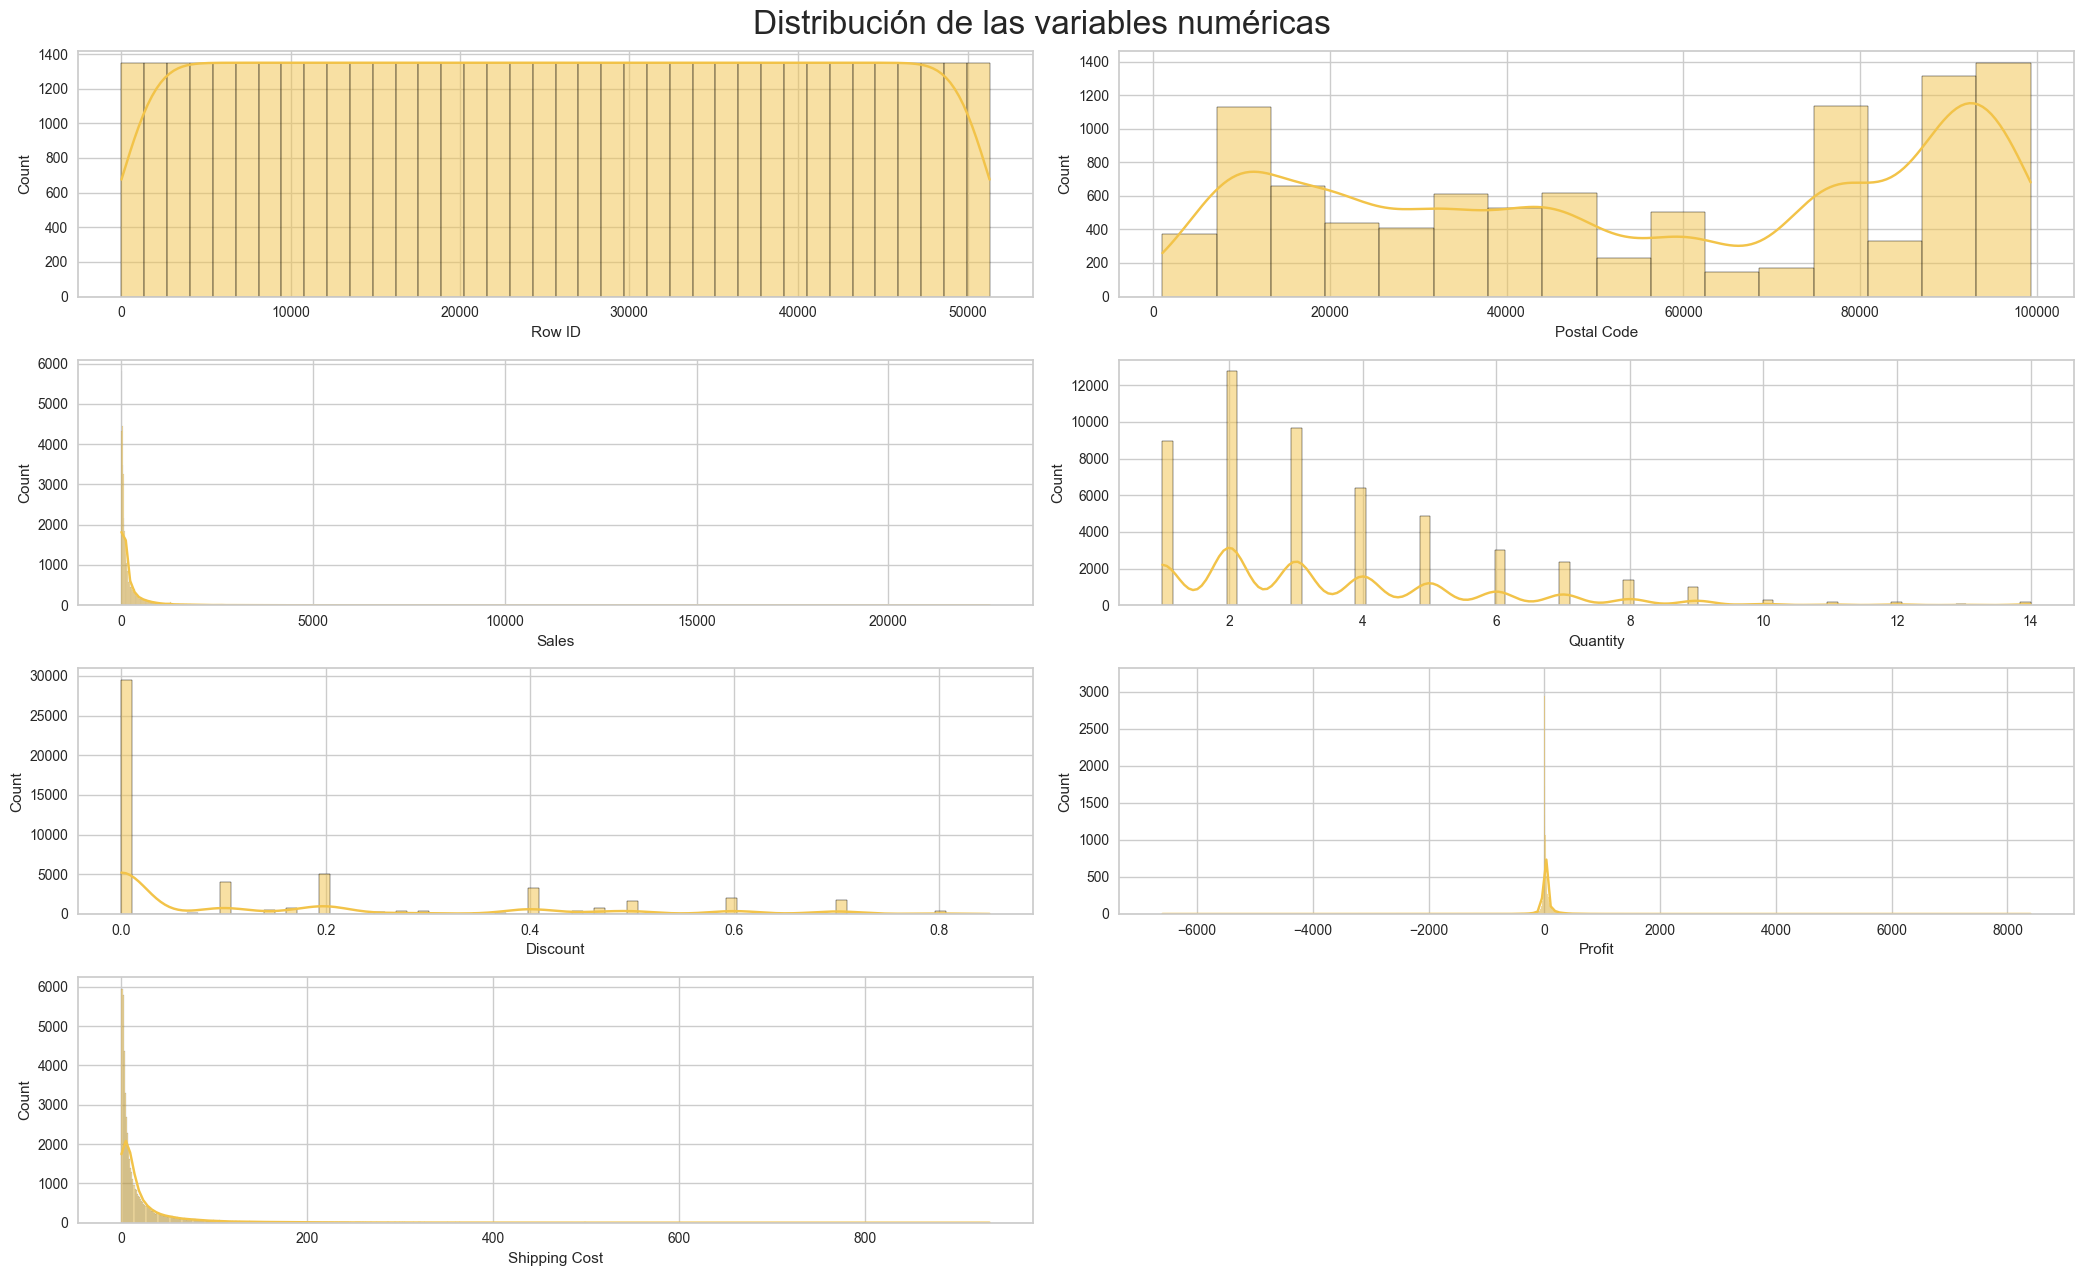

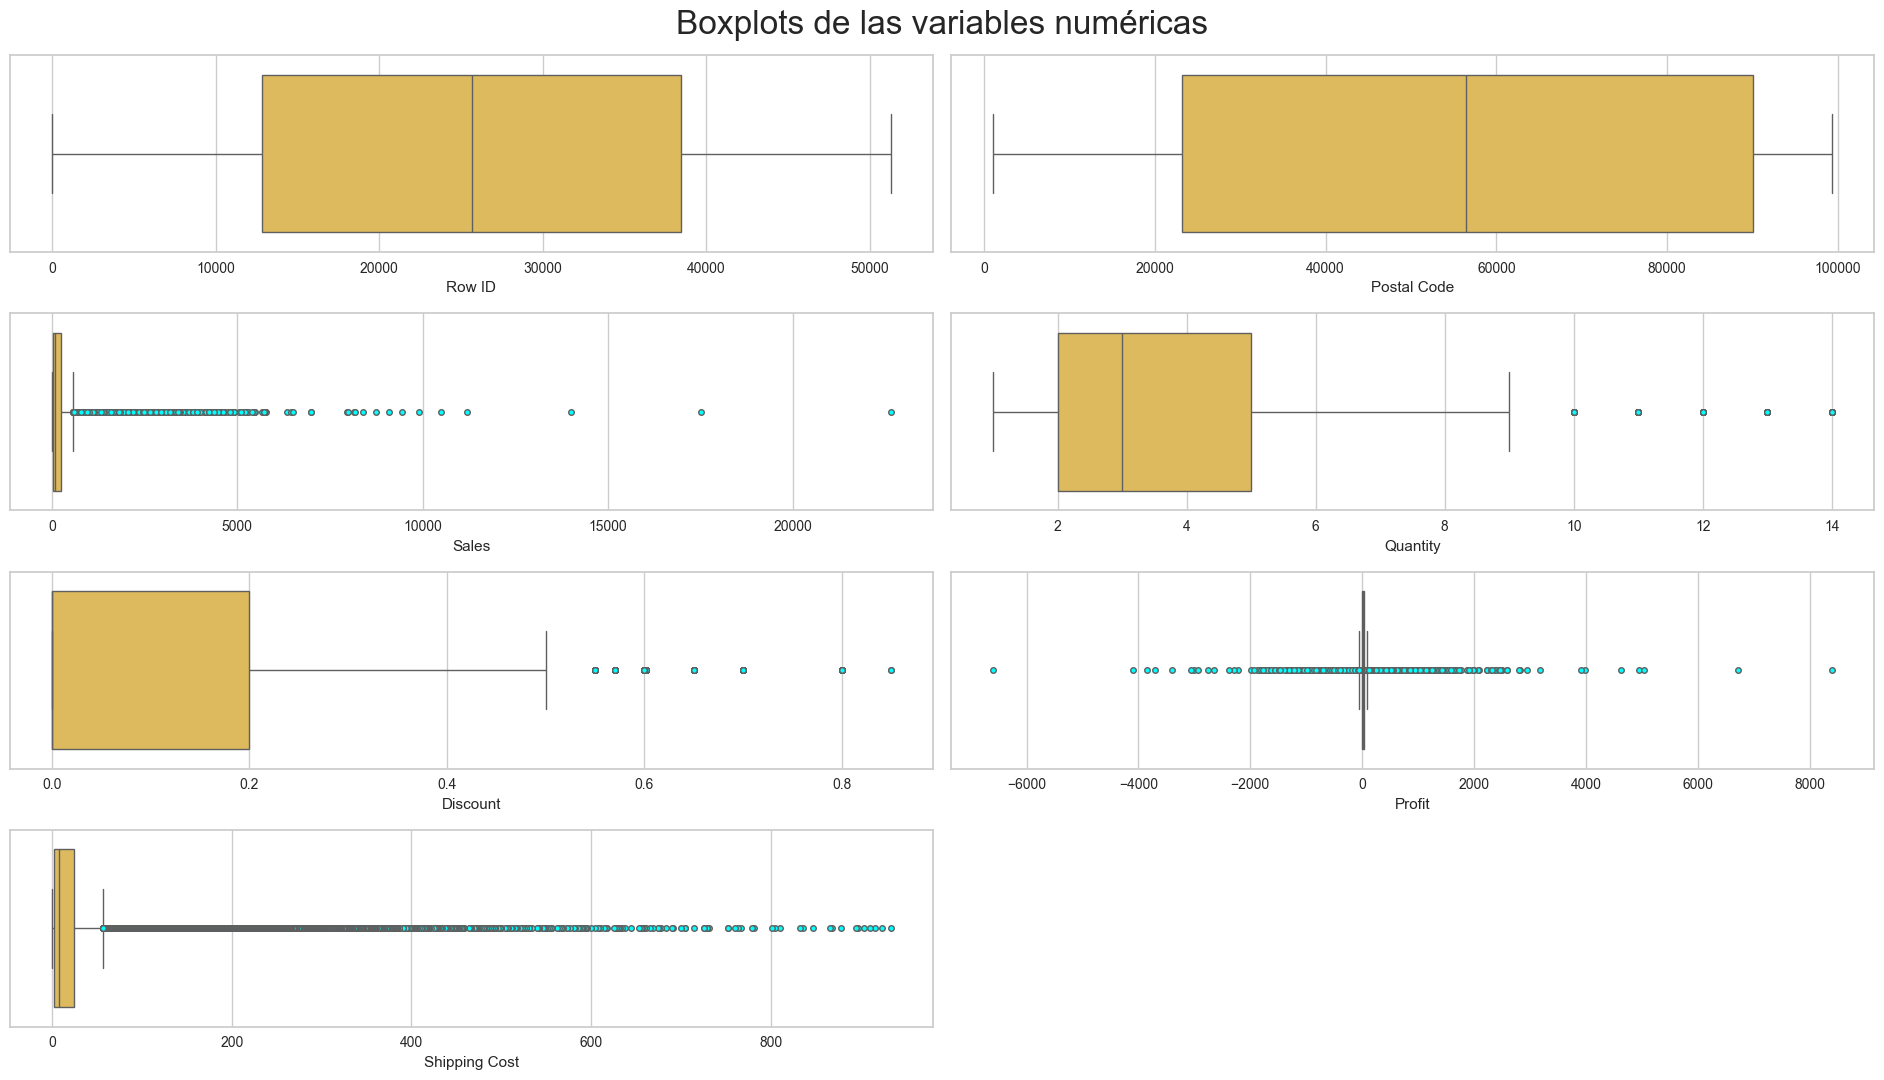

In [8]:
preprocesar.visualizar_numericas()


In [9]:
so.describe_outliers(df)

,columna,n_outliers,limite_inf,limite_sup,%_outliers
4,Profit,9755,-55.215000,92.025000,19.02
5,Shipping Cost,5909,-30.150000,57.210000,11.52
1,Sales,5655,-299.683238,581.495063,11.03
3,Discount,4172,-0.300000,0.500000,8.13
2,Quantity,877,-2.500000,9.500000,1.71
0,Row ID,0,-25643.500000,76934.500000,0.00


Vemos que hay muchos outliers, pero de momento no los vamos a eliminar ni imputar pues son datos de ventas, que queremos analizar y clasificar. Son datos verídicos. Si son extremos puede ser que genern clusters propios y ahí los analizaremos.

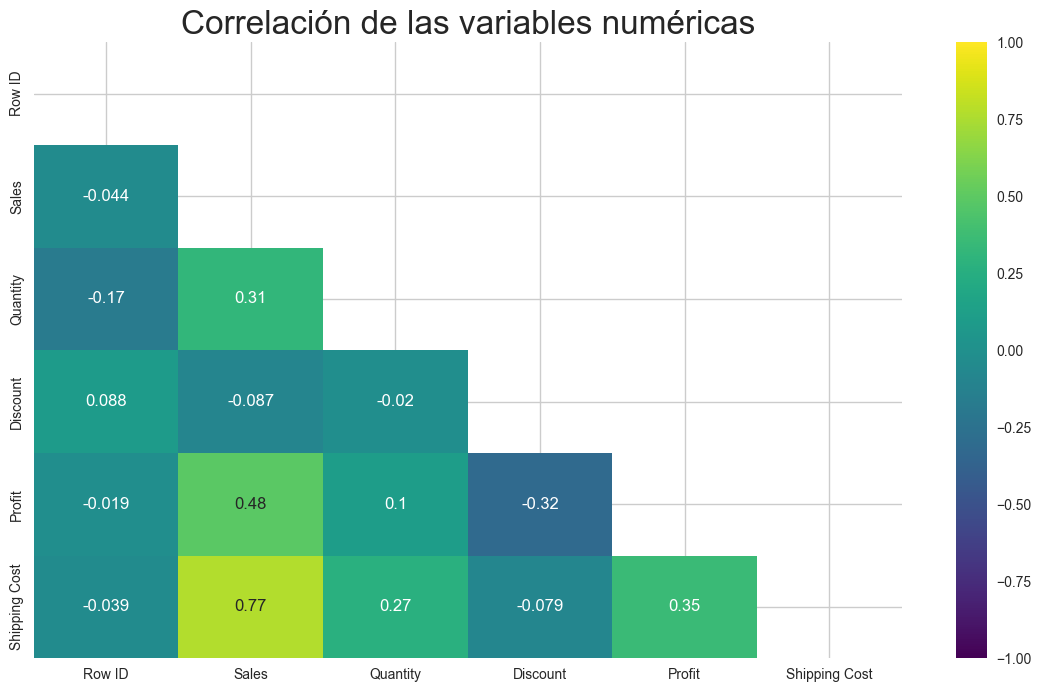

In [10]:
preprocesar = sc.Exploracion(df)
# evaluamos la correlación entre las variables numéricas
preprocesar.correlacion()

Row ID es un ID de fila, para la clasificación de clustrs no aporta, así que lo eliminamos

Customer ID y Customer Name aportan el mismo tipo de información para identificar a so clientes, nos quedamos solo con Customer ID, y eliminamos Customer Name

In [44]:
df = df.drop(columns=["Row ID", "Customer Name"])
df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Segment,City,State,Country,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,CA-2012-124891,31-07-2012,31-07-2012,Same Day,RH-19495,Consumer,New York City,New York,United States,US,East,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,IN-2013-77878,05-02-2013,07-02-2013,Second Class,JR-16210,Corporate,Wollongong,New South Wales,Australia,APAC,Oceania,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,IN-2013-71249,17-10-2013,18-10-2013,First Class,CR-12730,Consumer,Brisbane,Queensland,Australia,APAC,Oceania,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,ES-2013-1579342,28-01-2013,30-01-2013,First Class,KM-16375,Home Office,Berlin,Berlin,Germany,EU,Central,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,SG-2013-4320,05-11-2013,06-11-2013,Same Day,RH-9495,Consumer,Dakar,Dakar,Senegal,Africa,Africa,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical


In [45]:
# instanciamos la clase de Preprocesado de datos antes de aplicar el algoritmo
preprocesar = sc.Preprocesado(df)

# estandarizamos los datos
df_copia = preprocesar.estandarizar()

# chequeamos que se estandarizó correctamente
df_copia.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Segment,City,State,Country,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,CA-2012-124891,31-07-2012,31-07-2012,Same Day,RH-19495,Consumer,New York City,New York,United States,US,East,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,4.231596,1.546227,-0.673210,4.207735,15.833395,Critical
1,IN-2013-77878,05-02-2013,07-02-2013,Second Class,JR-16210,Corporate,Wollongong,New South Wales,Australia,APAC,Oceania,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",7.102511,2.423903,-0.202129,-1.820450,15.659911,Critical
2,IN-2013-71249,17-10-2013,18-10-2013,First Class,CR-12730,Consumer,Brisbane,Queensland,Australia,APAC,Oceania,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",10.108857,2.423903,-0.202129,5.112790,15.517842,Medium
3,ES-2013-1579342,28-01-2013,30-01-2013,First Class,KM-16375,Home Office,Berlin,Berlin,Germany,EU,Central,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",5.427057,0.668550,-0.202129,-0.717859,15.424817,Medium
4,SG-2013-4320,05-11-2013,06-11-2013,Same Day,RH-9495,Consumer,Dakar,Dakar,Senegal,Africa,Africa,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",5.304919,1.985065,-0.673210,1.622750,15.300550,Critical


In [46]:
preprocesar.codificar()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Segment,City,State,Country,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,0.000058,0.000565,0.000507,0.052661,0.000955,0.517021,0.017840,0.021993,0.194853,0.194853,0.055527,0.000195,0.197719,0.059953,0.000195,4.231596,1.546227,-0.673210,4.207735,15.833395,0.076662
1,0.000078,0.000858,0.000565,0.200994,0.000897,0.300819,0.002554,0.015227,0.055313,0.214506,0.067986,0.000195,0.192552,0.066953,0.000487,7.102511,2.423903,-0.202129,-1.820450,15.659911,0.076662
2,0.000097,0.000565,0.000702,0.146325,0.001131,0.517021,0.003470,0.013979,0.055313,0.214506,0.067986,0.000195,0.197719,0.065451,0.000468,10.108857,2.423903,-0.202129,5.112790,15.517842,0.573855
3,0.000019,0.000702,0.000487,0.146325,0.001365,0.182160,0.004231,0.004231,0.040261,0.194970,0.216748,0.000078,0.197719,0.065451,0.000448,5.427057,0.668550,-0.202129,-0.717859,15.424817,0.573855
4,0.000019,0.001228,0.001033,0.052661,0.000136,0.517021,0.001657,0.001657,0.002184,0.089433,0.089433,0.000019,0.197719,0.043342,0.000234,5.304919,1.985065,-0.673210,1.622750,15.300550,0.076662
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,0.000078,0.000994,0.000994,0.052661,0.001189,0.300819,0.000078,0.000117,0.004874,0.214506,0.045584,0.000097,0.609729,0.047183,0.000351,-0.372037,0.668550,-0.673210,-0.138299,-0.460168,0.573855
51286,0.000058,0.001053,0.000799,0.600019,0.001638,0.517021,0.007350,0.019205,0.194853,0.194853,0.216748,0.000078,0.609729,0.034217,0.000078,-0.504648,-1.086803,3.095436,-0.170478,-0.460168,0.573855
51287,0.000078,0.001189,0.001170,0.052661,0.001423,0.182160,0.000175,0.039013,0.194853,0.194853,0.062449,0.000156,0.609729,0.047475,0.000156,-0.458549,-0.209126,-0.673210,-0.099692,-0.460168,0.302223
51288,0.000136,0.000429,0.000546,0.600019,0.001404,0.182160,0.000175,0.007974,0.031176,0.200702,0.129557,0.000175,0.609729,0.119945,0.000702,-0.477993,-0.647964,-0.673210,-0.150345,-0.460343,0.573855


In [47]:
df_copia.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Segment,City,State,Country,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,0.000058,0.000565,0.000507,0.052661,0.000955,0.517021,0.017840,0.021993,0.194853,0.194853,0.055527,0.000195,0.197719,0.059953,0.000195,4.231596,1.546227,-0.673210,4.207735,15.833395,0.076662
1,0.000078,0.000858,0.000565,0.200994,0.000897,0.300819,0.002554,0.015227,0.055313,0.214506,0.067986,0.000195,0.192552,0.066953,0.000487,7.102511,2.423903,-0.202129,-1.820450,15.659911,0.076662
2,0.000097,0.000565,0.000702,0.146325,0.001131,0.517021,0.003470,0.013979,0.055313,0.214506,0.067986,0.000195,0.197719,0.065451,0.000468,10.108857,2.423903,-0.202129,5.112790,15.517842,0.573855
3,0.000019,0.000702,0.000487,0.146325,0.001365,0.182160,0.004231,0.004231,0.040261,0.194970,0.216748,0.000078,0.197719,0.065451,0.000448,5.427057,0.668550,-0.202129,-0.717859,15.424817,0.573855
4,0.000019,0.001228,0.001033,0.052661,0.000136,0.517021,0.001657,0.001657,0.002184,0.089433,0.089433,0.000019,0.197719,0.043342,0.000234,5.304919,1.985065,-0.673210,1.622750,15.300550,0.076662


Una vez que nuestros datos están preprocesados pasamos a los distintos métodos para agrupar en clusters.

### Kmeans

Aplciamos el metodo del codo para elegir el numero  de clusters adecuado

In [48]:
# instanciamos la clase de clustering
modelos = sc.Clustering(df_copia)

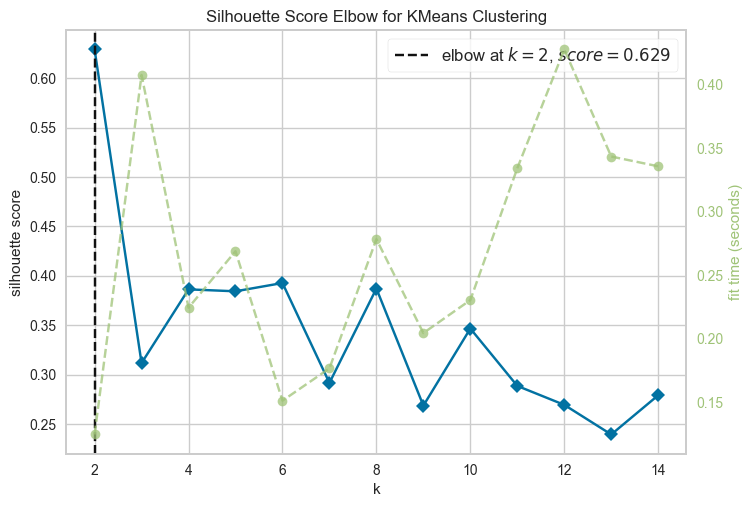

In [49]:

# sacamos el número de clusters óptimos para hacer el Kmeans 
modelos.sacar_clusters_kmeans()

Vamos a aplicar el kmeans con el numero de klusters (2) que nos indica la gráfica. El silhouette score es bueno.

In [50]:
df, labels  = modelos.modelo_kmeans(df_copia, 2)
# mostramos el DataFrame
df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Segment,City,State,Country,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,clusters_kmeans
0,0.000058,0.000565,0.000507,0.052661,0.000955,0.517021,0.017840,0.021993,0.194853,0.194853,0.055527,0.000195,0.197719,0.059953,0.000195,4.231596,1.546227,-0.673210,4.207735,15.833395,0.076662,1
1,0.000078,0.000858,0.000565,0.200994,0.000897,0.300819,0.002554,0.015227,0.055313,0.214506,0.067986,0.000195,0.192552,0.066953,0.000487,7.102511,2.423903,-0.202129,-1.820450,15.659911,0.076662,1
2,0.000097,0.000565,0.000702,0.146325,0.001131,0.517021,0.003470,0.013979,0.055313,0.214506,0.067986,0.000195,0.197719,0.065451,0.000468,10.108857,2.423903,-0.202129,5.112790,15.517842,0.573855,1
3,0.000019,0.000702,0.000487,0.146325,0.001365,0.182160,0.004231,0.004231,0.040261,0.194970,0.216748,0.000078,0.197719,0.065451,0.000448,5.427057,0.668550,-0.202129,-0.717859,15.424817,0.573855,1
4,0.000019,0.001228,0.001033,0.052661,0.000136,0.517021,0.001657,0.001657,0.002184,0.089433,0.089433,0.000019,0.197719,0.043342,0.000234,5.304919,1.985065,-0.673210,1.622750,15.300550,0.076662,1


In [56]:

frecuencia_clusters = df["clusters_kmeans"].value_counts()
frecuencia_clusters

clusters_kmeans
0    48611
1     2679
Name: count, dtype: int64

In [26]:
modelos.calcular_metricas(labels) 

,silhouette_score,davies_bouldin_index,cardinalidad
0,0.394068,1.126599,40568


Interpretamos las métricas obtenidas:
 
- Tenemos que el silhouette_score de 0.39 lo que sugiere que lso clusters podrían estar más separados.

-  El davies_boultin_index de 1.12 esta algo lejos del valor ideal de 0, pero en es posbile que haya solapamientos. Otro indiador de que la separació de los clusters es mejorable

- En cuanto a la cardinaldiad, la miramos en conjuto con los que nos devuelve la variable frencuencia_clusters pues nos indica como se reparten los datos en los clusters. Vemos un desequilibrio enorme en el numero de datos en cada cluster.

Aunque las metricas son mejorables, entenderemos mejor la caldiad de los custers analizando como ha agrupado lso datos, pues hay variables, como "Country", "State", "City" o "Region" en las que puede no ser importante que haya solapamiento , como  las características de los datos de cada cluster

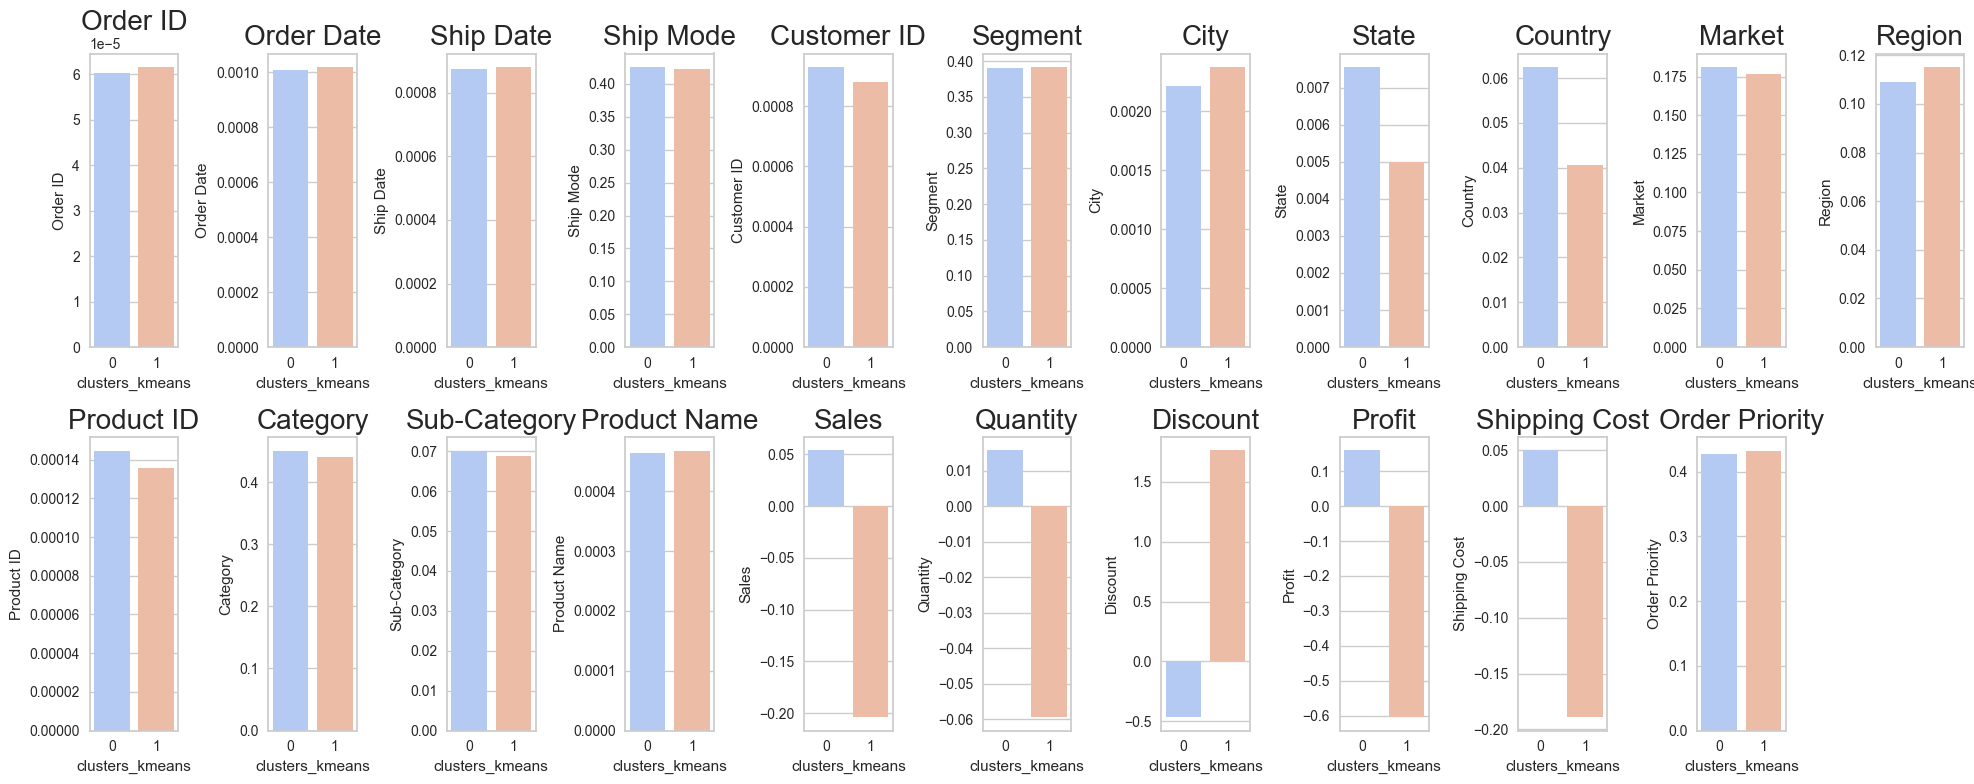

In [20]:
columnas_plot = df.columns.drop("clusters_kmeans")

# Crear subplots
fig, axes = plt.subplots(nrows=2, ncols=math.ceil(len(columnas_plot) / 2), figsize=(20, 8))
axes = axes.flat

for indice, columna in enumerate(columnas_plot):
    df_group = df.groupby("clusters_kmeans")[columna].mean().reset_index()
    sns.barplot(x="clusters_kmeans", y=columna, data=df_group, ax=axes[indice], palette="coolwarm")
    axes[indice].set_title(columna, fontsize=20)

plt.tight_layout()

# Eliminar ejes vacíos si existen
if len(columnas_plot) % 2 != 0:
    fig.delaxes(axes[-1])

plt.show()

In [21]:
category_distribution = df.groupby("clusters_kmeans",)['Category'].value_counts(normalize=True).unstack()
print(category_distribution)

Category         0.192552  0.197719  0.609729
clusters_kmeans                              
0                0.183544  0.201735  0.614721
1                0.226637  0.182522  0.590841


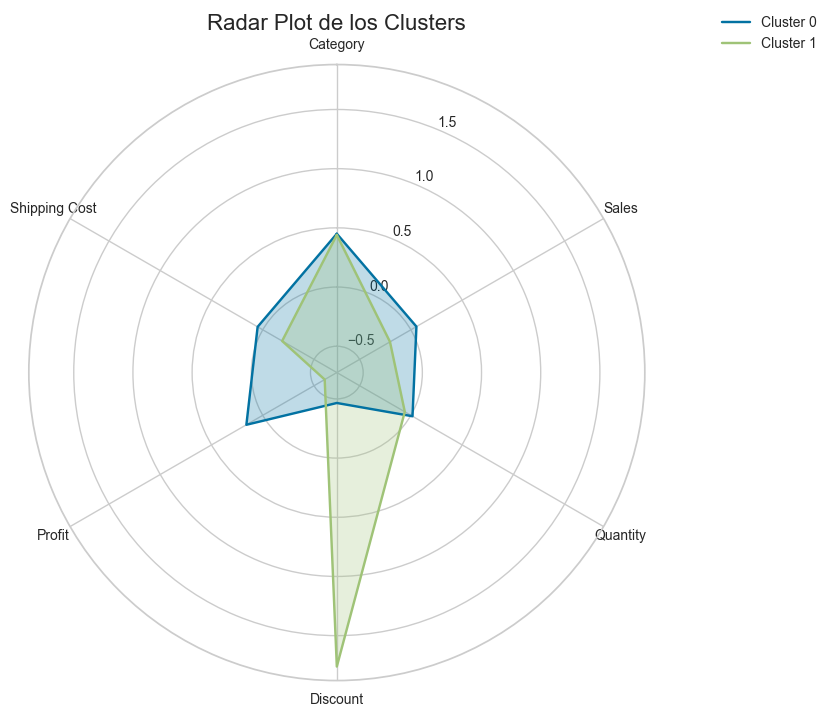

In [ ]:
# sacamos un RadarPlot de las variables que consideramos más importantes
variables = ['Category','Sales', 'Quantity',
       'Discount', 'Profit', 'Shipping Cost']

modelos.radar_plot(df, variables, "clusters_kmeans")

A la vista de las graficas concluimos que los clusters han agrupado de la siguiente manera:


- En el cluster 0 aquellos productos con mayor numero de ventas ("Sales"), de los que se pidió mayor cantidad ("Quantity"), con mayor beneficio ("Profit"), con mayor coste de envío asociado ("Shipping Cost") y con menores descuentos ("Discount")

- En el cluster 1 están los que no cumplen con las carácteristias del, sino al contrario.

Observamos que no ha agrupado por categorías.

In [ ]:
# Guardamos una copia del df preprocesado con los clusters del kmeans asociados
df_kmeans = df.copy()

In [ ]:
df_kmeans.head()

**En este punto hemos intentado encontrar clusters usando el metodo aglomerativo, y hubo que parar la ejecución después de más de dos horas sin obtener resultado**

### Dbscan

In [27]:
df = df.drop(columns=["clusters_kmeans"])


In [28]:
df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Segment,City,State,Country,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,0.000058,0.000565,0.000507,0.052661,0.000955,0.517021,0.017840,0.021993,0.194853,0.194853,0.055527,0.000195,0.197719,0.059953,0.000195,4.231596,1.546227,-0.673210,4.207735,15.833395,0.076662
1,0.000078,0.000858,0.000565,0.200994,0.000897,0.300819,0.002554,0.015227,0.055313,0.214506,0.067986,0.000195,0.192552,0.066953,0.000487,7.102511,2.423903,-0.202129,-1.820450,15.659911,0.076662
2,0.000097,0.000565,0.000702,0.146325,0.001131,0.517021,0.003470,0.013979,0.055313,0.214506,0.067986,0.000195,0.197719,0.065451,0.000468,10.108857,2.423903,-0.202129,5.112790,15.517842,0.573855
3,0.000019,0.000702,0.000487,0.146325,0.001365,0.182160,0.004231,0.004231,0.040261,0.194970,0.216748,0.000078,0.197719,0.065451,0.000448,5.427057,0.668550,-0.202129,-0.717859,15.424817,0.573855
4,0.000019,0.001228,0.001033,0.052661,0.000136,0.517021,0.001657,0.001657,0.002184,0.089433,0.089433,0.000019,0.197719,0.043342,0.000234,5.304919,1.985065,-0.673210,1.622750,15.300550,0.076662


In [30]:
df_dbscan  = modelos.modelo_dbscan(df, eps_values=[0.5, 1.0], min_samples_values=[500, 1000, 2000, 5000])
df_dbscan

eps: 0.5, min_samples: 500, silhouette: 0.17175710899158136
eps: 0.5, min_samples: 1000, silhouette: 0.17623296436414038
eps: 0.5, min_samples: 2000, silhouette: 0.1117438869477117
eps: 0.5, min_samples: 5000, silhouette: -1
eps: 1.0, min_samples: 500, silhouette: 0.42463773917613507
eps: 1.0, min_samples: 1000, silhouette: 0.41824671597944785
eps: 1.0, min_samples: 2000, silhouette: 0.40592462112451955
eps: 1.0, min_samples: 5000, silhouette: 0.3766396883158493


,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Segment,City,State,Country,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,clusters_dbscan
0,0.000058,0.000565,0.000507,0.052661,0.000955,0.517021,0.017840,0.021993,0.194853,0.194853,0.055527,0.000195,0.197719,0.059953,0.000195,4.231596,1.546227,-0.673210,4.207735,15.833395,0.076662,-1
1,0.000078,0.000858,0.000565,0.200994,0.000897,0.300819,0.002554,0.015227,0.055313,0.214506,0.067986,0.000195,0.192552,0.066953,0.000487,7.102511,2.423903,-0.202129,-1.820450,15.659911,0.076662,-1
2,0.000097,0.000565,0.000702,0.146325,0.001131,0.517021,0.003470,0.013979,0.055313,0.214506,0.067986,0.000195,0.197719,0.065451,0.000468,10.108857,2.423903,-0.202129,5.112790,15.517842,0.573855,-1
3,0.000019,0.000702,0.000487,0.146325,0.001365,0.182160,0.004231,0.004231,0.040261,0.194970,0.216748,0.000078,0.197719,0.065451,0.000448,5.427057,0.668550,-0.202129,-0.717859,15.424817,0.573855,-1
4,0.000019,0.001228,0.001033,0.052661,0.000136,0.517021,0.001657,0.001657,0.002184,0.089433,0.089433,0.000019,0.197719,0.043342,0.000234,5.304919,1.985065,-0.673210,1.622750,15.300550,0.076662,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,0.000078,0.000994,0.000994,0.052661,0.001189,0.300819,0.000078,0.000117,0.004874,0.214506,0.045584,0.000097,0.609729,0.047183,0.000351,-0.372037,0.668550,-0.673210,-0.138299,-0.460168,0.573855,0
51286,0.000058,0.001053,0.000799,0.600019,0.001638,0.517021,0.007350,0.019205,0.194853,0.194853,0.216748,0.000078,0.609729,0.034217,0.000078,-0.504648,-1.086803,3.095436,-0.170478,-0.460168,0.573855,1
51287,0.000078,0.001189,0.001170,0.052661,0.001423,0.182160,0.000175,0.039013,0.194853,0.194853,0.062449,0.000156,0.609729,0.047475,0.000156,-0.458549,-0.209126,-0.673210,-0.099692,-0.460168,0.302223,0
51288,0.000136,0.000429,0.000546,0.600019,0.001404,0.182160,0.000175,0.007974,0.031176,0.200702,0.129557,0.000175,0.609729,0.119945,0.000702,-0.477993,-0.647964,-0.673210,-0.150345,-0.460343,0.573855,0


El mejor modelo se obtiene para eps: 1.0, min_samples: 500 con silhouette: 0.42463773917613507. El daataframe anterior tiene aplciados los clusters para esos parametros. Veamos la cardinalidad de cada cluster.

In [31]:
frecuencia_clusters = df_dbscan["clusters_dbscan"].value_counts()
frecuencia_clusters

clusters_dbscan
 0    37240
 1     9648
-1     4402
Name: count, dtype: int64

Igual que hicimos con kmeans vamos a analizar las características de cada uno de los tres clusters que nos ha dado el metodo Dbscan

In [32]:
modelos.calcular_metricas(df_dbscan["clusters_dbscan"]) 

,silhouette_score,davies_bouldin_index,cardinalidad
0,0.424638,1.260671,37240


El silhouette_score es algo mejor que en el kmeans. El indice de davies_bouldi también. En todo caso vamos a ver como agrupan los clusters con este modelo para ver si es mejor que los clusters que obtuvimos con kmeans.

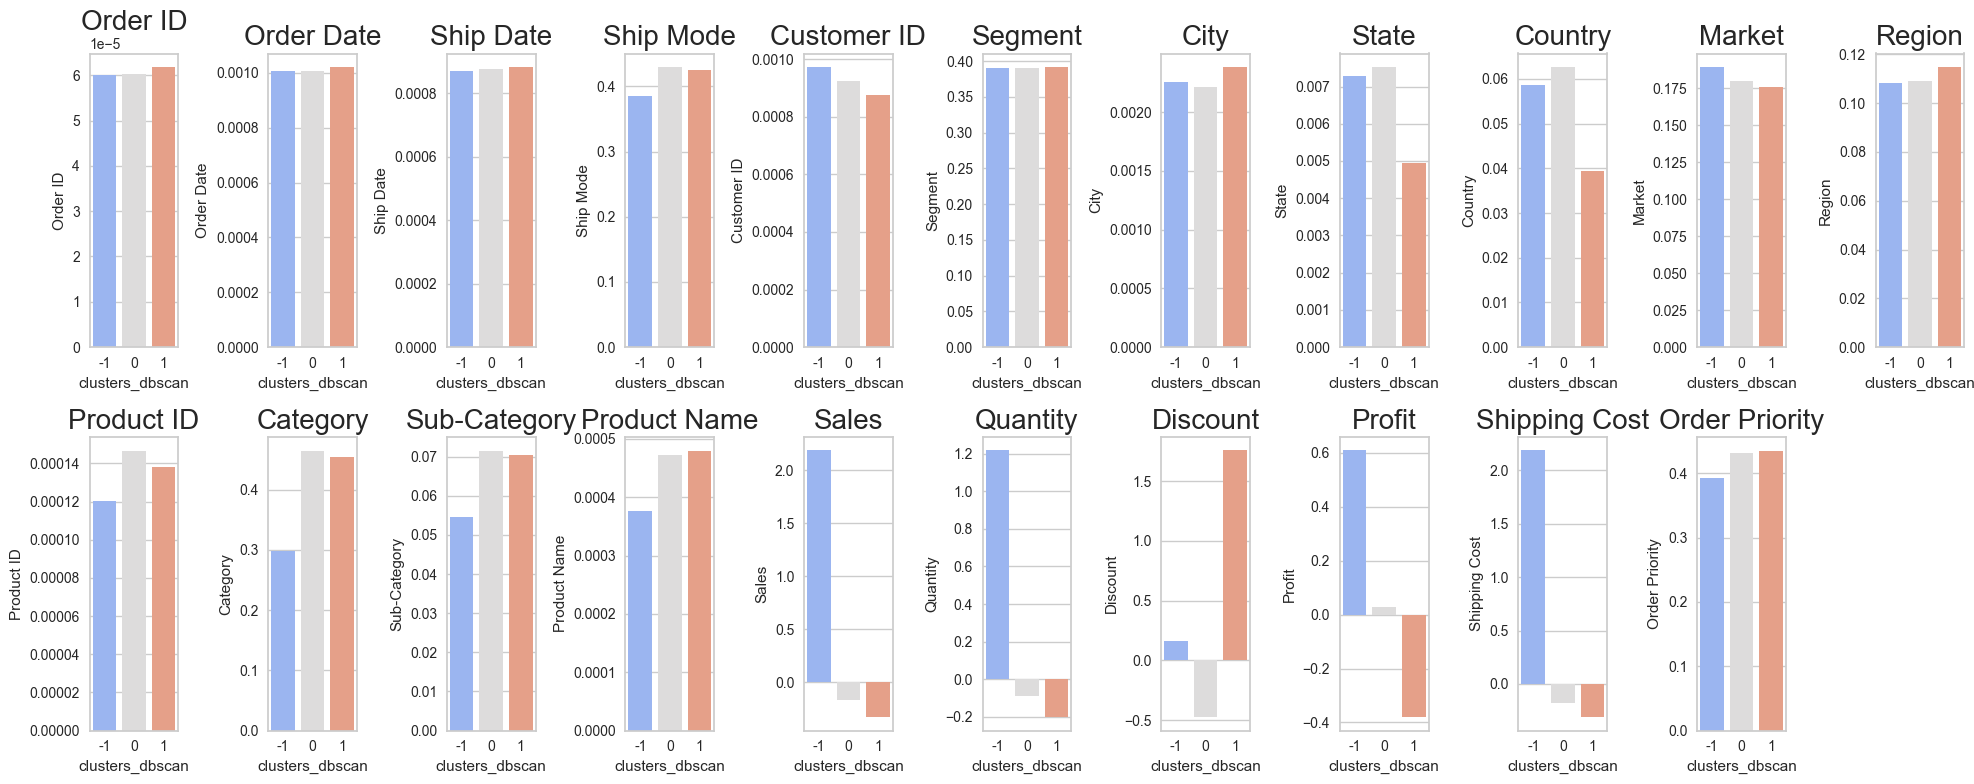

In [33]:
columnas_plot = df.columns.drop("clusters_dbscan")

# Crear subplots
fig, axes = plt.subplots(nrows=2, ncols=math.ceil(len(columnas_plot) / 2), figsize=(20, 8))
axes = axes.flat

for indice, columna in enumerate(columnas_plot):
    df_group = df.groupby("clusters_dbscan")[columna].mean().reset_index()
    sns.barplot(x="clusters_dbscan", y=columna, data=df_group, ax=axes[indice], palette="coolwarm")
    axes[indice].set_title(columna, fontsize=20)

plt.tight_layout()

# Eliminar ejes vacíos si existen
if len(columnas_plot) % 2 != 0:
    fig.delaxes(axes[-1])

plt.show()

In [34]:
category_distribution = df.groupby("clusters_dbscan",)['Category'].value_counts(normalize=True).unstack()
print(category_distribution)

Category         0.192552  0.197719  0.609729
clusters_dbscan                              
-1               0.368696  0.383008  0.248296
 0               0.168528  0.183029  0.648443
 1               0.204913  0.169880  0.625207


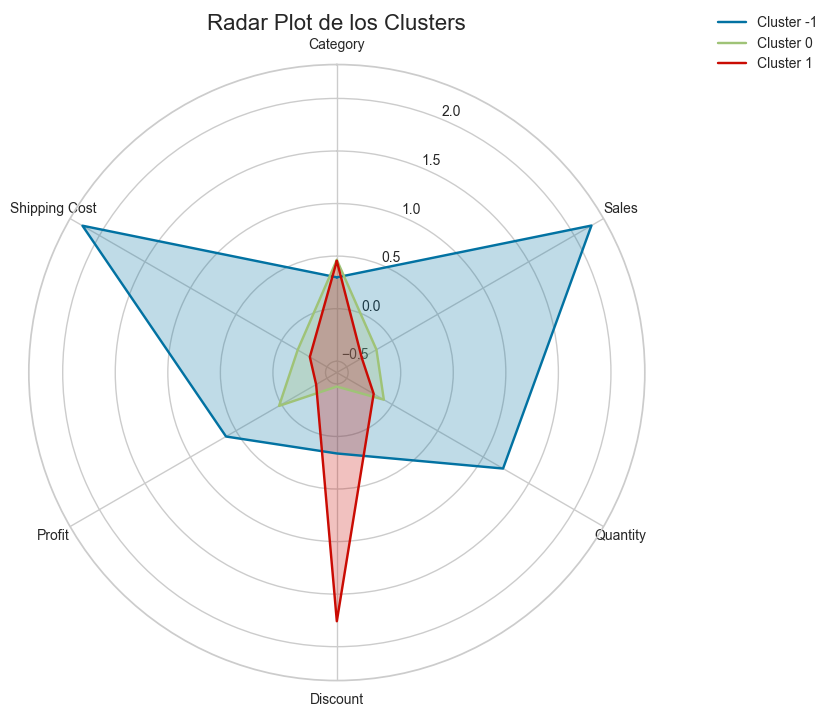

In [35]:
# sacamos un RadarPlot de las variables que más diferencias presentan en los clusters en la gráfica anterior
variables = ['Category','Sales', 'Quantity',
       'Discount', 'Profit', 'Shipping Cost']

modelos.radar_plot(df, variables, "clusters_dbscan")

A la vista de las graficas concluimos que los clusters han agrupado de la siguiente manera:

- En el cluster -1 aquellos productos con un mayor numero de ventas ("Sales"), de los que se pidió mayor cantidad ("Quantity"), con mayor beneficio ("Profit") y con mayor coste de envío asociado ("Shipping Cost") 

- En el cluster 1 están los productos que presentan un mayor descuento ("Discount").

- En el cluster 0 vemos que están los que tienen un menor beneficio ("Profit")

Los clusters que nos da Dbscan tienen mejores métricas, y una cardinalidad más equilibrada. Además permiten una agrupación más espcifica que los de kmeans permitiendo por ejemplo agrupar por un lado los de mayor descuento y por ortro los de menor beneficio. Por lo tanto no s quedaremos con los clusters de Dbscan por encima de los de kmeans

In [36]:
df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Segment,City,State,Country,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,clusters_dbscan
0,0.000058,0.000565,0.000507,0.052661,0.000955,0.517021,0.017840,0.021993,0.194853,0.194853,0.055527,0.000195,0.197719,0.059953,0.000195,4.231596,1.546227,-0.673210,4.207735,15.833395,0.076662,-1
1,0.000078,0.000858,0.000565,0.200994,0.000897,0.300819,0.002554,0.015227,0.055313,0.214506,0.067986,0.000195,0.192552,0.066953,0.000487,7.102511,2.423903,-0.202129,-1.820450,15.659911,0.076662,-1
2,0.000097,0.000565,0.000702,0.146325,0.001131,0.517021,0.003470,0.013979,0.055313,0.214506,0.067986,0.000195,0.197719,0.065451,0.000468,10.108857,2.423903,-0.202129,5.112790,15.517842,0.573855,-1
3,0.000019,0.000702,0.000487,0.146325,0.001365,0.182160,0.004231,0.004231,0.040261,0.194970,0.216748,0.000078,0.197719,0.065451,0.000448,5.427057,0.668550,-0.202129,-0.717859,15.424817,0.573855,-1
4,0.000019,0.001228,0.001033,0.052661,0.000136,0.517021,0.001657,0.001657,0.002184,0.089433,0.089433,0.000019,0.197719,0.043342,0.000234,5.304919,1.985065,-0.673210,1.622750,15.300550,0.076662,-1


In [59]:
df_dbscan.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Segment,City,State,Country,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,clusters_dbscan
0,0.000058,0.000565,0.000507,0.052661,0.000955,0.517021,0.017840,0.021993,0.194853,0.194853,0.055527,0.000195,0.197719,0.059953,0.000195,4.231596,1.546227,-0.673210,4.207735,15.833395,0.076662,-1
1,0.000078,0.000858,0.000565,0.200994,0.000897,0.300819,0.002554,0.015227,0.055313,0.214506,0.067986,0.000195,0.192552,0.066953,0.000487,7.102511,2.423903,-0.202129,-1.820450,15.659911,0.076662,-1
2,0.000097,0.000565,0.000702,0.146325,0.001131,0.517021,0.003470,0.013979,0.055313,0.214506,0.067986,0.000195,0.197719,0.065451,0.000468,10.108857,2.423903,-0.202129,5.112790,15.517842,0.573855,-1
3,0.000019,0.000702,0.000487,0.146325,0.001365,0.182160,0.004231,0.004231,0.040261,0.194970,0.216748,0.000078,0.197719,0.065451,0.000448,5.427057,0.668550,-0.202129,-0.717859,15.424817,0.573855,-1
4,0.000019,0.001228,0.001033,0.052661,0.000136,0.517021,0.001657,0.001657,0.002184,0.089433,0.089433,0.000019,0.197719,0.043342,0.000234,5.304919,1.985065,-0.673210,1.622750,15.300550,0.076662,-1


In [ ]:
df_dbscan.to_csv('../datos/Global_Superstore_clustering.csv')